# **Prediction using Supervised ML**
Predicting percentage of a student who studies 9.5 hours.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

#print("Defined create_model and train_model")

In [3]:
data_file=pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
feature=data_file.loc[:,"Hours"]

In [5]:
my_feature=np.array(feature)

In [6]:
label=data_file.loc[:,"Scores"]

In [7]:
my_label=np.array(label)

In [8]:
epochs=3

Primarily the batch size of 3 is not giving goo accuracies. Checking on upto 15 , the most promising batch size was found to be **10** as it was neither having higher bias or varinace.

In [9]:
my_batch_size=10

In [10]:
learning_rate=10

In [11]:
my_model=build_model(learning_rate)

In [12]:
trained_weight,trained_bias,epochs,rmse=train_model(my_model,my_feature,my_label,epochs,my_batch_size)

Epoch 1/3
3/3 [==============================] - 1s 4ms/step - loss: 14283.8916 - root_mean_squared_error: 119.5152
Epoch 2/3
3/3 [==============================] - 0s 3ms/step - loss: 183.9566 - root_mean_squared_error: 13.5631
Epoch 3/3
3/3 [==============================] - 0s 5ms/step - loss: 67.1078 - root_mean_squared_error: 8.1919


## **Model built and trained**

In [13]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


## **Defined the plot_the_model and plot_the_loss_curve functions.**

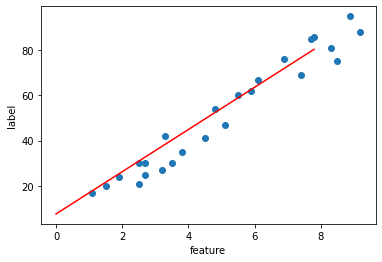

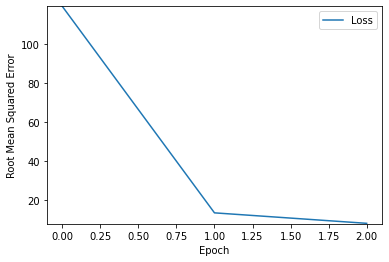

In [14]:
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [15]:
rmse

0    119.515236
1     13.563061
2      8.191938
Name: root_mean_squared_error, dtype: float64

In [16]:
q=np.array([9.5])

In [17]:
ans=my_model.predict_on_batch(q)

In [18]:
print("Prediction is:",ans)

Prediction is: [[96.23885]]
